# Cosmology: Second project

## Getting started with CLASS

The first lines will link Colab to Google Drive and do Class installation, so most of the following lines will need one ejecution only.

In [1]:
import os

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create folder just once 
#os.chdir('/content/drive/MyDrive/')
#!mkdir Cosmology2022

In [ ]:
# Change directory (Move to the folder)
os.chdir('/content/drive/MyDrive/Cosmology2022')

In [ ]:
%%shell
## Do only once
#git clone https://github.com/lesgourg/class_public.git

In [ ]:
%%shell
# Here we can see that it worked, the folder exists
ls
#class_public
cd class_public

class_public


In [ ]:
os.chdir('/content/drive/MyDrive/Cosmology2022/class_public') # change directory (move to class_public folder)

In [ ]:
%%shell 
# Here we "install" Class, therefore, we will do it just one time.
#make

In [ ]:
%%shell
# What's inside class_public?
ls

base_2015_plikHM_TT_lowTEB_lensing.ini	       libclass.a
base_2018_plikHM_TTTEEE_lowl_lowE_lensing.ini  main
build					       Makefile
class					       MPS_default.png
CLASS_rename.py				       MPS-hV.png
cl_permille.pre				       MPS-ObV.png
cl_ref.pre				       MPS-OcmbV.png
CMB-PS-BdV.png				       MPS-TV.png
CMB-PS_default.png			       myevolution.dat
CMB-PS-hV.png				       myselection.dat
CMB-PS-OcmbV.png			       notebooks
CMB-PS-TV.png				       output
cpp					       pk_ref.pre
CPU.py					       plot_CLASS_output.m
default2COPY.ini			       psd_FD_single.dat
defaultCOPY.ini				       python
default.ini				       README.md
doc					       scripts
explanatory.ini				       source
external				       test
include					       tools


At this point, it is important to create a copy of the default.ini file, and use that copy to change the parameters (here we'll use defaultCOPY). Once the copy is made and saved in the same Google Drive folder, double click on the copied file and go to "Output parameters". Look for "write_background" and change "no" to "yes".

Now we are ready to start manipulating data.


## Data and graphs

In [ ]:
%%shell
# Do we have all the data needed? It's important to check whether we have the defaultCOPY.ini on our Class folder or not
./class defaultCOPY.ini

Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = 0.690026
Running CLASS version v3.2.0
Computing background
 -> age = 13.770598 Gyr
 -> conformal age = 14151.897989 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3405.751104
    corresponding to conformal time = 112.722902 Mpc
Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1088.775232
    corresponding to conformal time = 280.650005 Mpc
    with comoving sound horizon = 144.510134 Mpc
    angular diameter distance = 12.728540 Mpc
    sound horizon angle 100*theta_s = 1.041796
    Thomson optical depth crosses one at z_* = 1085.129318
    giving an angle 100*theta_* = 1.044144
 -> baryon drag stops at z = 1059.921811
    corresponding to conformal time = 286.316116 Mpc
    with comoving sound horizon rs = 147.071382 Mpc


In [ ]:
%%shell
# Here we can see the data stored in the file
more output/defaultCOPY00_background.dat

more: stat of output/defaultCOPY00_background.dat failed: No such file or directory


****************************************
In general, we will use the following files:

* *default_cl_dat*: plot column 2 vs. column 1 (multipole momentum), for cmb(cosmic microwave background) power spectrum.
* *default_pk.dat*: we'll reproduce the mass power spectrum.

We will not use *default_lensed*.
****************************************
The default cosmological parameter values are (this is what defaultCOPY.ini has by default, as the name suggests):
* h =  0.67810 $⟹$ Dimensionless reduced Hubble parameter ($H_0$ / (100km/s/Mpc))
* $H_0$ = 67.810 $⟹$ Hubble parameter in km/s/Mpc
* $T_{CMB}$ = 2.7255 $⟹$ CMB temperature
* $\Omega_b$ = 0.02238280 $⟹$ Reduced baryon density ($\Omega h^2$)
* $\Omega_{CMB}$ = 0.1201075 $⟹$ CMB density
* $\Omega_k$ = 0.0 $⟹$ Curvature density

The following graphs are plotted with the original data:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

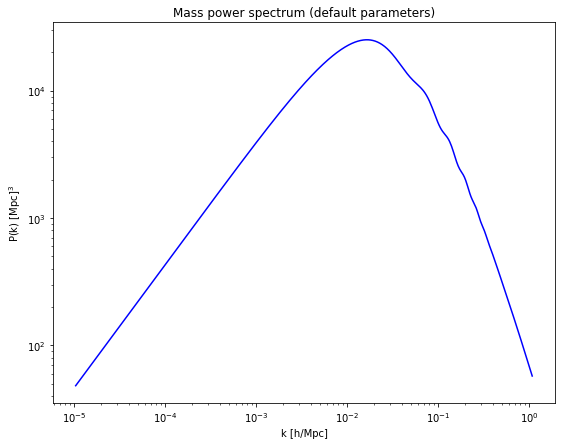

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = 'defaultCOPY00_pk.dat'
data = np.loadtxt(ruta + nombreArchivo)
#print(data)

k = []
p=[]
for fila in data:
  k_simple = fila[0]
  p_simple = fila[1]
  k.append(k_simple)
  p.append(p_simple)

#print(k)
#print(p)

plt.rcParams["figure.figsize"] = (9,7)
plt.plot(k, p, color = "blue")
plt.xlabel("k [h/Mpc]")
plt.ylabel("P(k) [Mpc]$^3$")
plt.title("Mass power spectrum (default parameters)")
plt.xscale("log")
plt.yscale("log")
plt.savefig('MPS_default.png')
plt.show()

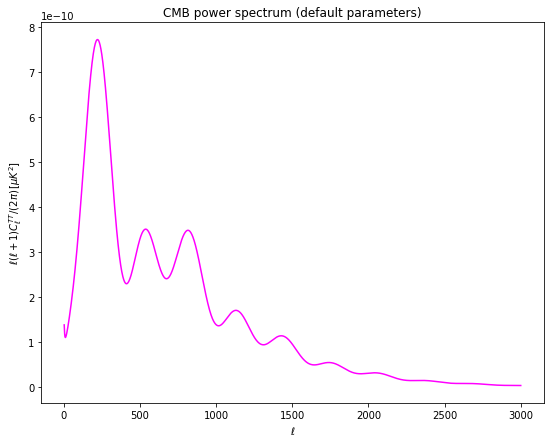

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = 'defaultCOPY00_cl.dat'
data = np.loadtxt(ruta + nombreArchivo).T
#print(data)

'''l = []
n = []
for fila in data:
  l_simple = fila[0]
  n_simple = fila[1]
  l.append(l_simple)
  n.append(n_simple)

print(l)
print(n)'''

plt.rcParams["figure.figsize"] = (9,7)
plt.plot(data[0], data[1], color = "magenta")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi) \, [\mu K^2 ]$')
plt.title("CMB power spectrum (default parameters)")
plt.savefig('CMB-PS_default.png')
plt.show()

Now, we will vary: h, $T_{CMB}$, $\Omega_b$, and $\Omega_{CMB}$. Notice that we'll work with the $\Lambda$-CMB model, where the curvature is zero, but in the end we will vary $\Omega_k$ to see its behavior.

Since we are going to make the changes manually, we will take one interval and divide it into 5 parts for each variation.

1. ***h*** variation

defaultCOPY01: h = 0.1\
defaultCOPY02: h = 0.29\
defaultCOPY03: h = 0.48\
defaultCOPY04: h = 0.86

In [ ]:
print(np.linspace(0.1, 0.67,4))

[0.1  0.29 0.48 0.67]


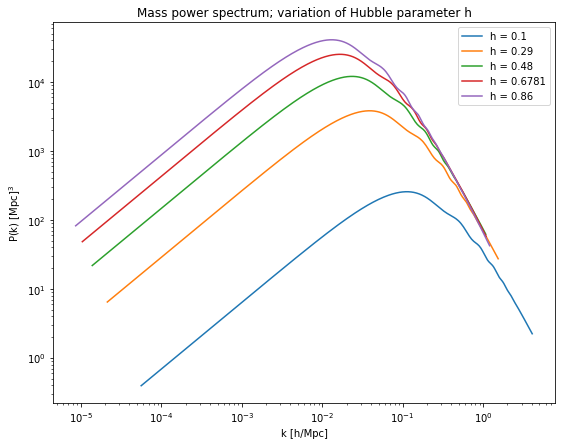

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = ['defaultCOPY01_pk.dat', 'defaultCOPY02_pk.dat', 'defaultCOPY03_pk.dat', 'defaultCOPY00_pk.dat', 'defaultCOPY04_pk.dat']
forL = ['h = 0.1', 'h = 0.29', 'h = 0.48', 'h = 0.6781', 'h = 0.86']
plt.rcParams["figure.figsize"] = (9,7)

count = 0
for arch in range(len(nombreArchivo)):
  data = np.loadtxt(ruta + nombreArchivo[arch])
  k, p = [], []
  for fila in data:
    k_simple = fila[0]
    p_simple = fila[1]
    k.append(k_simple)
    p.append(p_simple)

  plt.plot(k, p, label = forL[count])
  count += 1
  
plt.xlabel("k [h/Mpc]")
plt.ylabel("P(k) [Mpc]$^3$")
plt.title("Mass power spectrum; variation of Hubble parameter h")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.savefig('MPS-hV.png')
plt.show()

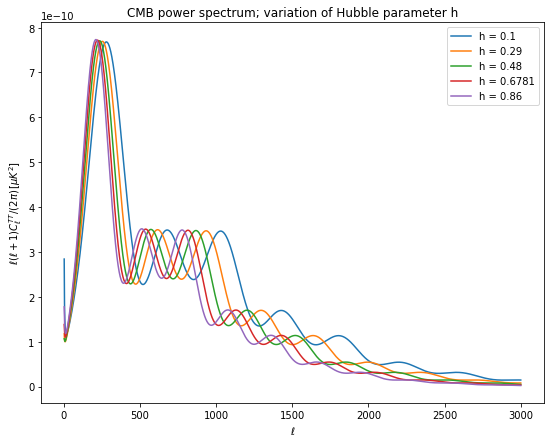

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = ['defaultCOPY01_cl.dat', 'defaultCOPY02_cl.dat', 'defaultCOPY03_cl.dat', 'defaultCOPY00_cl.dat', 'defaultCOPY04_cl.dat']
forL = ['h = 0.1', 'h = 0.29', 'h = 0.48', 'h = 0.6781', 'h = 0.86']
plt.rcParams["figure.figsize"] = (9,7)

for arch in range(len(nombreArchivo)):
  count = 0
  data = np.loadtxt(ruta + nombreArchivo[arch]).T
  if count == 0:
    plt.plot(data[0], data[1], label = forL[arch])
  else:
    plt.plot(data[0], data[1])
  count += 1

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi) \, [\mu K^2 ]$')
plt.title("CMB power spectrum; variation of Hubble parameter h")
plt.legend()
plt.savefig('CMB-PS-hV.png')
plt.show()

2. ***$T_{CMB}$*** variation
*Note*: First we try with 1.2, 1.3, 1.4... until 1.75 the thermodynamic error did not come out (but we cannot be sure that 1.75 is the minimum value). Also, there is a maximum value at 2.85 (we cannot be sure that this is the maximum value it can take or that there are more decimals as well).

defaultCOPY10: $T_{CMB}$ = 1.75\
defaultCOPY11: $T_{CMB}$ = 2.0752\
defaultCOPY12: $T_{CMB}$ = 2.4003\
defaultCOPY17: $T_{CMB}$ = 2.85

In [ ]:
print(np.linspace(1.75, 2.7255,4))

[1.75       2.07516667 2.40033333 2.7255    ]


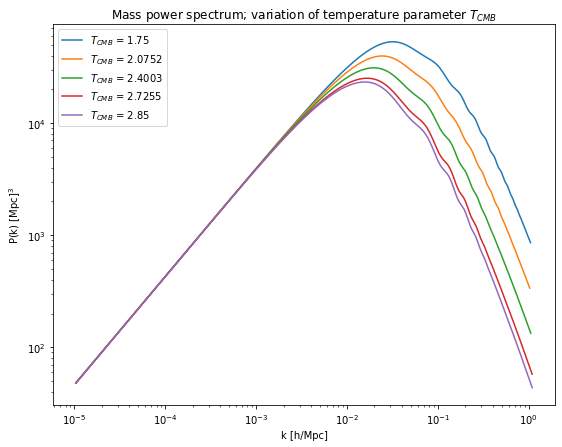

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = ['defaultCOPY10_pk.dat', 'defaultCOPY11_pk.dat', 'defaultCOPY12_pk.dat', 'defaultCOPY00_pk.dat', 'defaultCOPY17_pk.dat']
forL = ['$T_{CMB}$ = 1.75', '$T_{CMB}$ = 2.0752', '$T_{CMB}$ = 2.4003', '$T_{CMB}$ = 2.7255', '$T_{CMB}$ = 2.85']
plt.rcParams["figure.figsize"] = (9,7)

count = 0
for arch in range(len(nombreArchivo)):
  data = np.loadtxt(ruta + nombreArchivo[arch])
  k, p  = [], []
  for fila in data:
    k_simple = fila[0]
    p_simple = fila[1]
    k.append(k_simple)
    p.append(p_simple)

  plt.plot(k, p, label = forL[count])
  count += 1
  
plt.xlabel("k [h/Mpc]")
plt.ylabel("P(k) [Mpc]$^3$")
plt.title("Mass power spectrum; variation of temperature parameter $T_{CMB}$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.savefig('MPS-TV.png')
plt.show()

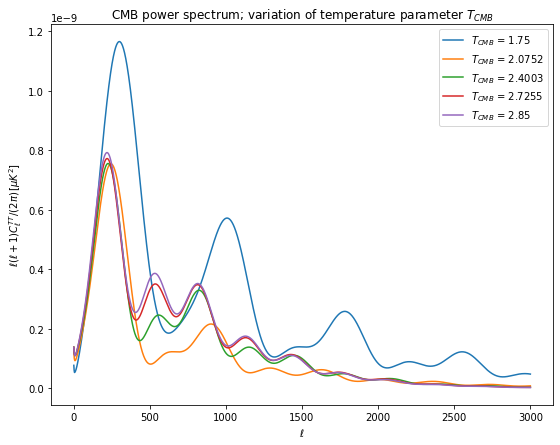

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = ['defaultCOPY10_cl.dat', 'defaultCOPY11_cl.dat', 'defaultCOPY12_cl.dat', 'defaultCOPY00_cl.dat', 'defaultCOPY17_cl.dat']
forL = ['$T_{CMB}$ = 1.75', '$T_{CMB}$ = 2.0752', '$T_{CMB}$ = 2.4003', '$T_{CMB}$ = 2.7255', '$T_{CMB}$ = 2.85']
plt.rcParams["figure.figsize"] = (9,7)

for arch in range(len(nombreArchivo)):
  count = 0
  data = np.loadtxt(ruta + nombreArchivo[arch]).T
  if count == 0:
    plt.plot(data[0], data[1], label = forL[arch])
  else:
    plt.plot(data[0], data[1])
  count += 1

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi) \, [\mu K^2 ]$')
plt.title("CMB power spectrum; variation of temperature parameter $T_{CMB}$")
plt.legend()
plt.savefig('CMB-PS-TV.png')
plt.show()

3. ***$\Omega_b$*** variation

defaultCOPY21: $\Omega_b$ = 0.01\
defaultCOPY18: $\Omega_b$ = 0.0141276\
defaultCOPY19: $\Omega_b$ = 0.0182552\
defaultCOPY20: $\Omega_b$ = 0.0265104

In [ ]:
print(np.linspace(0.01, 0.02238280, 4))

[0.01      0.0141276 0.0182552 0.0223828]


In [ ]:
%%shell
./class defaultCOPY.ini

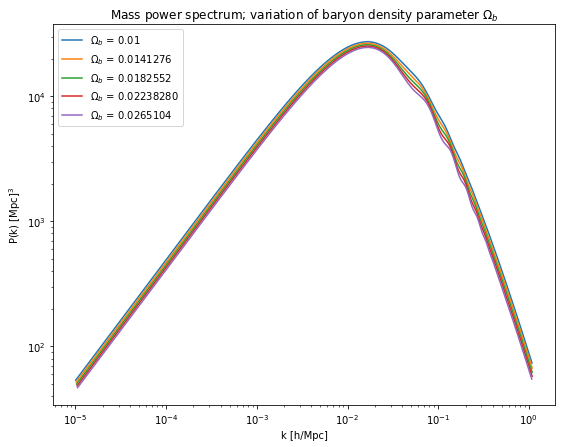

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = ['defaultCOPY21_pk.dat', 'defaultCOPY18_pk.dat', 'defaultCOPY19_pk.dat', 'defaultCOPY00_pk.dat', 'defaultCOPY20_pk.dat']
forL = ['$\Omega_b$ = 0.01', '$\Omega_b$ = 0.0141276', '$\Omega_b$ = 0.0182552', '$\Omega_b$ = 0.02238280', '$\Omega_b$ = 0.0265104']
plt.rcParams["figure.figsize"] = (9,7)

count = 0
for arch in range(len(nombreArchivo)):
  data = np.loadtxt(ruta + nombreArchivo[arch])
  k, p = [], []
  for fila in data:
    k_simple = fila[0]
    p_simple = fila[1]
    k.append(k_simple)
    p.append(p_simple)

  plt.plot(k, p, label = forL[count])
  count += 1
  
plt.xlabel("k [h/Mpc]")
plt.ylabel("P(k) [Mpc]$^3$")
plt.title("Mass power spectrum; variation of baryon density parameter $\Omega_b$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.savefig('MPS-ObV.png')
plt.show()

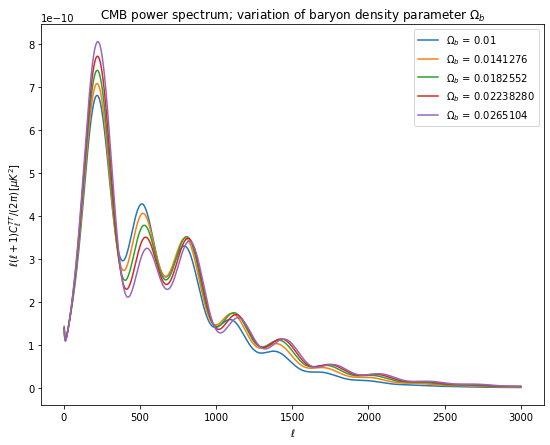

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = ['defaultCOPY21_cl.dat', 'defaultCOPY18_cl.dat', 'defaultCOPY19_cl.dat', 'defaultCOPY00_cl.dat', 'defaultCOPY20_cl.dat']
forL = ['$\Omega_b$ = 0.01', '$\Omega_b$ = 0.0141276', '$\Omega_b$ = 0.0182552', '$\Omega_b$ = 0.02238280', '$\Omega_b$ = 0.0265104']
plt.rcParams["figure.figsize"] = (9,7)

for arch in range(len(nombreArchivo)):
  count = 0
  data = np.loadtxt(ruta + nombreArchivo[arch]).T
  if count == 0:
    plt.plot(data[0], data[1], label = forL[arch])
  else:
    plt.plot(data[0], data[1])
  count += 1

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi) \, [\mu K^2 ]$')
plt.title("CMB power spectrum; variation of baryon density parameter $\Omega_b$")
plt.legend()
plt.savefig('CMB-PS-BdV.png')
plt.show()

4. ***$\Omega_{CMB}$*** variation
*Note*: First we try with 1.2, 1.3, 1.4... until 1.75 the thermodynamic error did not come out (but we cannot be sure that 1.75 is the minimum value). Also, there is a maximum value at 2.85 (we cannot be sure that this is the maximum value it can take or that there are more decimals as well).

defaultCOPY22: $\Omega_{CMB}$ = 0.01\
defaultCOPY23: $\Omega_{CMB}$ = 0.0467025\
defaultCOPY24: $\Omega_{CMB}$ = 0.083405\
defaultCOPY25: $\Omega_{CMB}$ = 0.15681

In [ ]:
print(np.linspace(0.01, 0.1201075, 4))

[0.01      0.0467025 0.083405  0.1201075]


In [ ]:
%%shell
./class defaultCOPY.ini

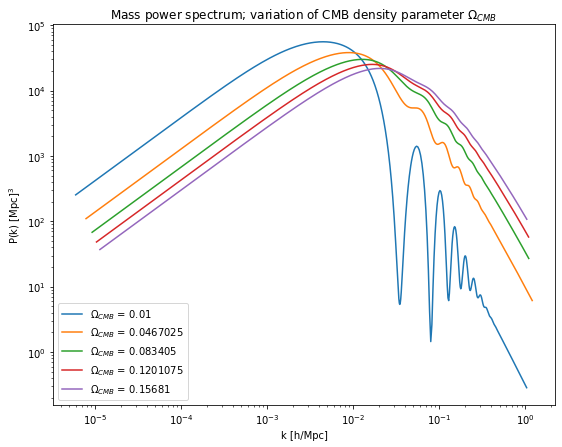

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = ['defaultCOPY22_pk.dat', 'defaultCOPY23_pk.dat', 'defaultCOPY24_pk.dat', 'defaultCOPY00_pk.dat', 'defaultCOPY25_pk.dat']
forL = ['$\Omega_{CMB}$ = 0.01', '$\Omega_{CMB}$ = 0.0467025', '$\Omega_{CMB}$ = 0.083405', '$\Omega_{CMB}$ = 0.1201075', '$\Omega_{CMB}$ = 0.15681']
plt.rcParams["figure.figsize"] = (9,7)

count = 0
for arch in range(len(nombreArchivo)):
  data = np.loadtxt(ruta + nombreArchivo[arch])
  k, p = [], []
  for fila in data:
    k_simple = fila[0]
    p_simple = fila[1]
    k.append(k_simple)
    p.append(p_simple)

  plt.plot(k, p, label = forL[count])
  count += 1
  
plt.xlabel("k [h/Mpc]")
plt.ylabel("P(k) [Mpc]$^3$")
plt.title("Mass power spectrum; variation of CMB density parameter $\Omega_{CMB}$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.savefig('MPS-OcmbV.png')
plt.show()

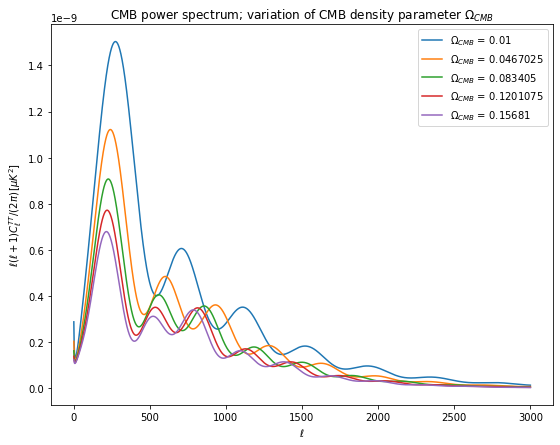

In [ ]:
ruta = '/content/drive/MyDrive/Cosmology2022/class_public/output/'
nombreArchivo = ['defaultCOPY22_cl.dat', 'defaultCOPY23_cl.dat', 'defaultCOPY24_cl.dat', 'defaultCOPY00_cl.dat', 'defaultCOPY25_cl.dat']
forL = ['$\Omega_{CMB}$ = 0.01', '$\Omega_{CMB}$ = 0.0467025', '$\Omega_{CMB}$ = 0.083405', '$\Omega_{CMB}$ = 0.1201075', '$\Omega_{CMB}$ = 0.15681']
plt.rcParams["figure.figsize"] = (9,7)

for arch in range(len(nombreArchivo)):
  count = 0
  data = np.loadtxt(ruta + nombreArchivo[arch]).T
  if count == 0:
    plt.plot(data[0], data[1], label = forL[arch])
  else:
    plt.plot(data[0], data[1])
  count += 1

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi) \, [\mu K^2 ]$')
plt.title("CMB power spectrum; variation of CMB density parameter $\Omega_{CMB}$")
plt.legend()
plt.savefig('CMB-PS-OcmbV.png')
plt.show()

## Varying multiple parameters

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Output, Button, IntText, Label, FloatText

In [4]:
with open("default2COPY.ini", "r") as file:
  lines = file.readlines()

# The position of each parameter we need are in lines (check file): 67, 73, 75, and 77
print(lines[67])
print(lines[73])
print(lines[75])
print(lines[77])
print(lines[82])
print(lines[87])
print(lines[66:88])

FileNotFoundError: ignored

In [ ]:
def dataMod(caller):
  out.clear_output()
        ### parameters ###
  h = h_input.value         # Dimensionless reduced Hubble parameter (H_0 / (100km/s/Mpc)) 
  T = T_input.value         # CMB temperature
  Ob = Ob_input.value       # Reduced baryon density (Omega*h^2)
  Ocmb = Ocmb_input.value   # Reduced cold dark matter density (Omega*h^2)
  Ok = Ok_input.value       # Curvature density
  
  # I'm not sure whether we have to change the Omega_lambda manually or not, because in the default.ini it's written that
  # it is not necessary to do so. Does the code change it internally in CLASS?
  # OLambda = 1 - Ob - Ocmb - Ok - 0.1568645561         # the constant at the end is a "correction" for the value

  print("-------------------")
  print(f"h = {h}\nT(CMB) = {T}\nOmega(b) = {Ob}\nOmega(cmb) = {Ocmb}\nOmega(k) = {Ok}")
  print("-------------------")
  
  with open("default2COPY.ini", "r") as file:
    lines = file.readlines()

  lines[67] = "h = " + str(h) + "               # Dimensionless reduced Hubble parameter (H_0 / (100km/s/Mpc))\n"
  lines[73] = "T_cmb = " + str(T) + "                # CMB temperature\n"
  lines[75] = "omega_b = " + str(Ob) + "              # Reduced baryon density (Omega*h^2)\n"
  lines[77] = "omega_cdm = " + str(Ocmb) + "             # Reduced cold dark matter density (Omega*h^2)\n"
  lines[82] = "Omega_k = " + str(Ok) + "                 # Curvature density\n"
  

  with open("default2COPY.ini", "w") as file:
    file.writelines(lines)

In [ ]:
def graph(caller):
  ruta = '/content/drive/MyDrive/Cosmology2022Extra/class_public/output/'
  # Add here all the files you want to plot!!
  #nombreArchivoM = ['default2COPY00_pk.dat', 'default2COPY05_pk.dat', 'default2COPY06_pk.dat', 'default2COPY07_pk.dat', 'default2COPY08_pk.dat', 'default2COPY09_pk.dat']
  #nombreArchivoC = ['default2COPY00_cl.dat', 'default2COPY05_cl.dat', 'default2COPY06_cl.dat', 'default2COPY07_cl.dat', 'default2COPY08_cl.dat', 'default2COPY09_cl.dat']
  nombreArchivoM = ['default2COPY00_pk.dat', 'default2COPY20_pk.dat', 'default2COPY21_pk.dat', 'default2COPY22_pk.dat', 'default2COPY23_pk.dat']
  nombreArchivoC = ['default2COPY00_cl.dat', 'default2COPY20_cl.dat', 'default2COPY21_cl.dat', 'default2COPY22_cl.dat', 'default2COPY23_cl.dat']
  
  fig, ax = plt.subplots(2, 1)
  fig.set_size_inches(12, 11)

  count3 = 1
  for arch in range(len(nombreArchivoM)):
    dataM = np.loadtxt(ruta + nombreArchivoM[arch])
    dataC = np.loadtxt(ruta + nombreArchivoC[arch]).T
    k, p, count, count2  = [], [], 0, 0
    for fila in dataM:
      k_simple = fila[0]
      p_simple = fila[1]
      k.append(k_simple)
      p.append(p_simple)

    ax[0].plot(k, p, label = "File " + str(count3))
    ax[1].plot(dataC[0], dataC[1], label = "File " + str(count3))
    count3 += 1
    ax[0].legend()
  
  ax[0].set_xlabel("k [h/Mpc]"), ax[0].set_ylabel("P(k) [Mpc]$^3$")
  ax[0].set_title("Mass power spectrum")
  ax[0].set_xscale("log"), ax[0].set_yscale("log")
  #ax[0].figure.savefig('Variacion_M1.png')
  ax[1].set_xlabel(r'$\ell$'), ax[1].set_ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi) \, [\mu K^2 ]$')
  ax[1].set_title("CMB power spectrum")
  ax[1].legend()
  ax[1].figure.savefig('Variacion_C1.png')
  plt.show()

The main idea of making something like a GUI with widgets in colab was to facilitate the work of running CLASS and creating graphics. However, it was impossible to implement the former (fully automated) because of the "%%shell" command used to run CLASS. So that step still has to be done manually after pressing the "add data" button.

It is highly recommended to create all the files that you want to plot on the same graph before pressing the "create plot" button. The "create plot" button will generate the graph with all the new files, but you have to write the list of file names before generating the graph.

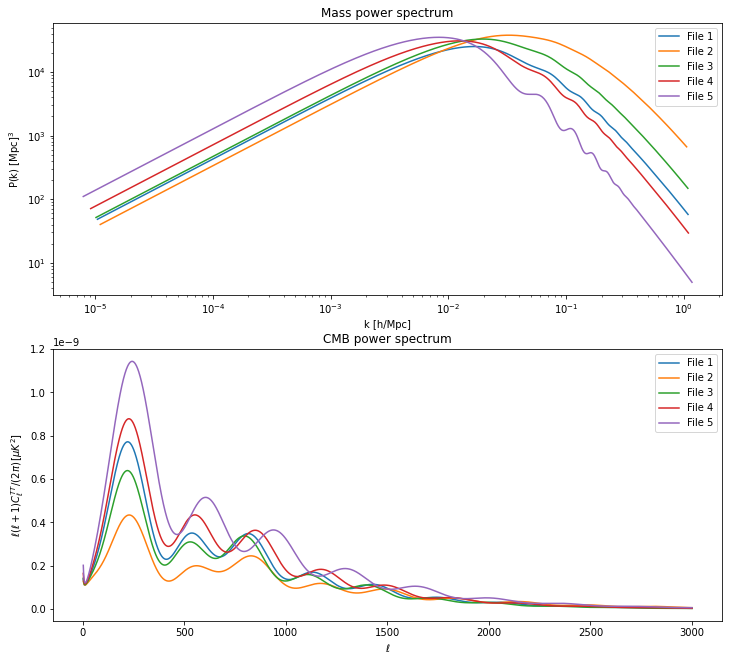

In [ ]:
%matplotlib inline
run_button = Button(description = 'Add data')
create_button = Button(description = 'Create plot')
h_input = widgets.BoundedFloatText(value=0.6781, min= 0.1, max=0.86, step=0.01, description = 'h')
T_input = widgets.BoundedFloatText(value=2.7255, min= 1.75, max=2.85, step=0.01, description ='T(CMB)')
Ob_input = widgets.BoundedFloatText(value=0.0223828, min= 0.01, max=0.0265104, step=0.001, description ='Omega(b)')
Ocmb_input = widgets.BoundedFloatText(value=0.1201075, min= 0.01, max=0.15681, step=0.01, description ='Omega(CMB)')
Ok_input = widgets.BoundedFloatText(value=0.0, min= 0.0, max=0.3, step=0.05, description ='Omega(k)')

out = Output()

run_button.on_click(dataMod)
create_button.on_click(graph)

all_widgets = HBox([VBox([HBox([run_button, create_button]),
                    h_input,
                    T_input,
                    Ob_input,
                    Ocmb_input,
                    Ok_input]),
                    out])

display(all_widgets)

In [ ]:
%%shell
./class default2COPY.ini

Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = 0.849647
Running CLASS version v3.2.0
Computing background
 -> age = 16.678707 Gyr
 -> conformal age = 18665.176826 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 1380.484632
    corresponding to conformal time = 254.219676 Mpc
Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1037.402462
    corresponding to conformal time = 323.173010 Mpc
    with comoving sound horizon = 167.591345 Mpc
    angular diameter distance = 17.663675 Mpc
    sound horizon angle 100*theta_s = 0.913702
    Thomson optical depth crosses one at z_* = 1030.843752
    giving an angle 100*theta_* = 0.918084
 -> baryon drag stops at z = 999.881913
    corresponding to conformal time = 333.145456 Mpc
    with comoving sound horizon rs = 172.205591 Mpc
 

### (CLASS backup)

In [5]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create folder just once 
#os.chdir('/content/drive/MyDrive/')
#!mkdir Cosmology2022Extra

In [ ]:
# Change directory (Move to the folder)
os.chdir('/content/drive/MyDrive/Cosmology2022Extra')

In [ ]:
%%shell
## Do only once
#git clone https://github.com/lesgourg/class_public.git

In [ ]:
%%shell
# Here we can see that it worked, the folder exists
ls
#class_public
cd class_public

class_public


In [ ]:
os.chdir('/content/drive/MyDrive/Cosmology2022Extra/class_public') # change directory (move to class_public folder)

In [ ]:
%%shell 
# Here we "install" Class, therefore, we will do it just one time.
#make

In [ ]:
%%shell
# What's inside class_public?
ls

base_2015_plikHM_TT_lowTEB_lensing.ini	       main
base_2018_plikHM_TTTEEE_lowl_lowE_lensing.ini  Makefile
build					       myevolution.dat
class					       myselection.dat
CLASS_rename.py				       notebooks
cl_permille.pre				       output
cl_ref.pre				       pk_ref.pre
cpp					       plot_CLASS_output.m
CPU.py					       psd_FD_single.dat
default.ini				       python
doc					       README.md
explanatory.ini				       scripts
external				       source
include					       test
libclass.a				       tools
